In [12]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier ,BaggingClassifier ,AdaBoostClassifier ,VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## Import data

In [13]:
data1=pd.read_csv(r'C:\Users\DELL\Desktop\breast cancer.csv')
data1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
data1.shape

(569, 32)

In [15]:
encode=preprocessing.LabelEncoder()

In [16]:
target=data1.iloc[:,1]
encode.fit(target)
y=encode.transform(target)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [17]:
data=data1.iloc[:,2:]
data=pd.DataFrame(data)
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Check Multicollinearity

In [18]:
import seaborn as sns

Text(0.5, 1.05, 'Correlation Matrix')

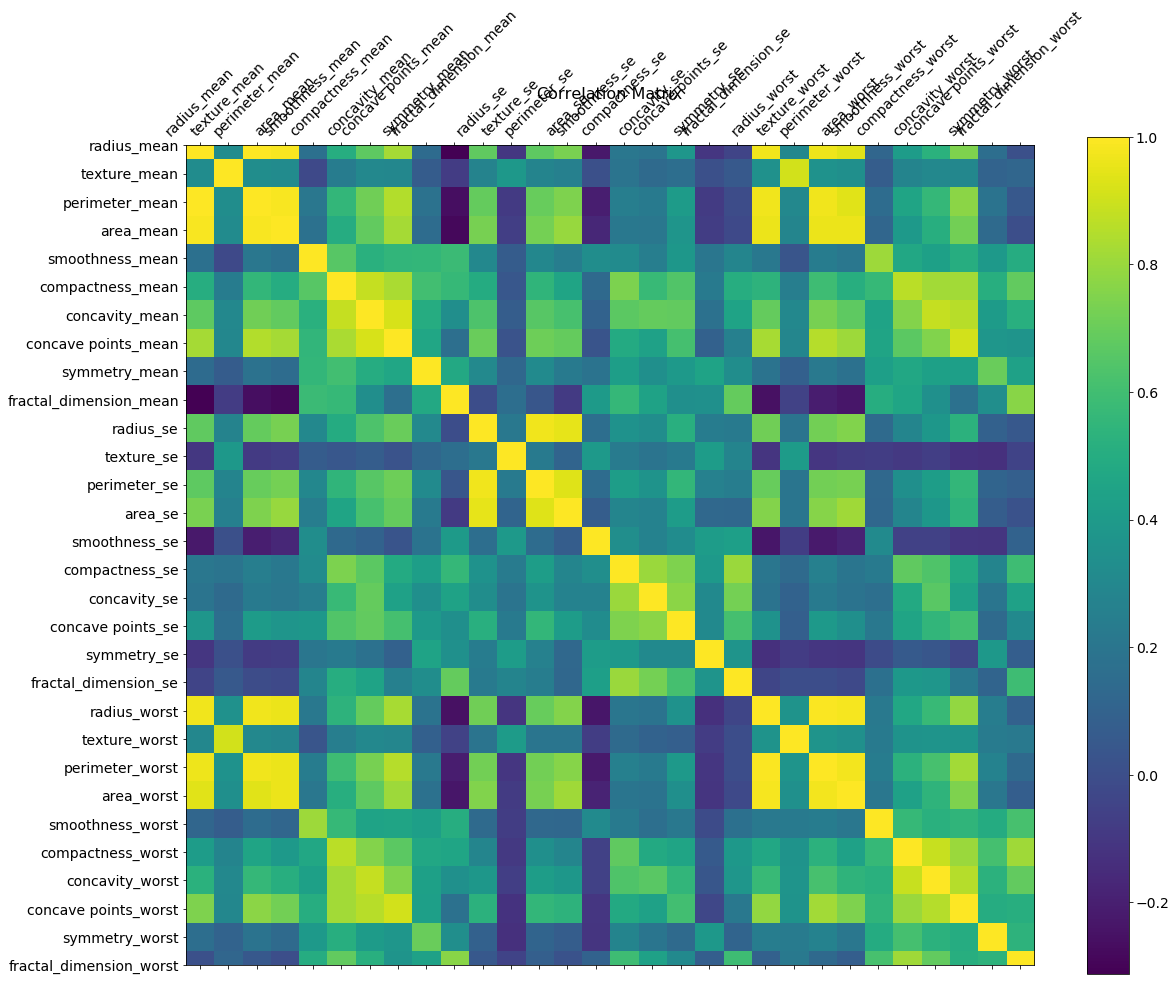

In [19]:
f=plt.figure(figsize=(19,15),facecolor='w',edgecolor="w")

plt.matshow(data.corr(),fignum=f.number)
plt.xticks(range(data.shape[1]),labels=data.columns,fontsize=14,rotation =45)
plt.yticks(range(data.shape[1]),data.columns,fontsize=14)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix",fontsize=16)

In [17]:
data.columns


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

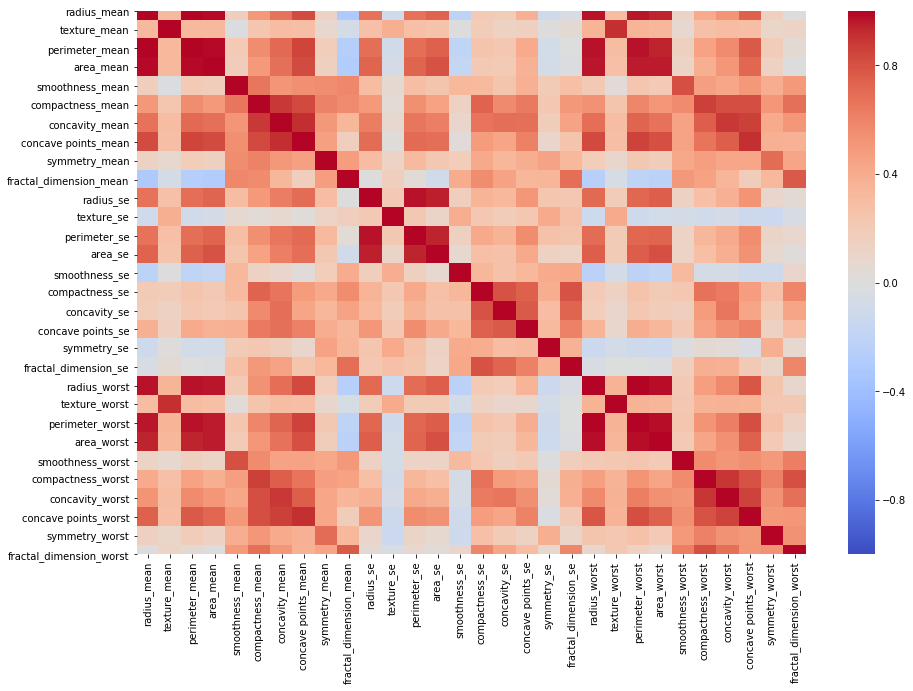

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap="coolwarm",fmt='.1g',vmin=-1,vmax=1,center =0,xticklabels='auto',yticklabels="auto")

# PCA

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
scaler=StandardScaler()
scaler.fit(data)
scaled_data=scaler.transform(data)

In [23]:
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
x_pca=pca.transform(scaled_data)
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

# Visualization of PCA in 2D

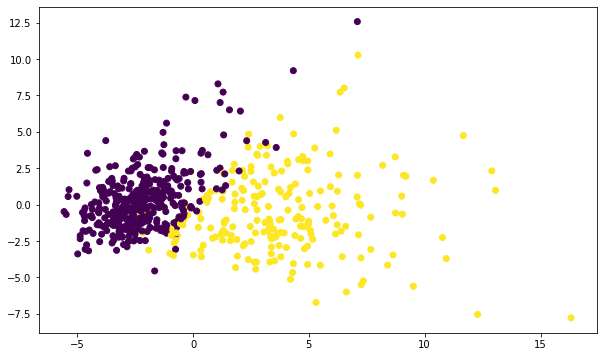

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)

# Visualization of PCA in 3D

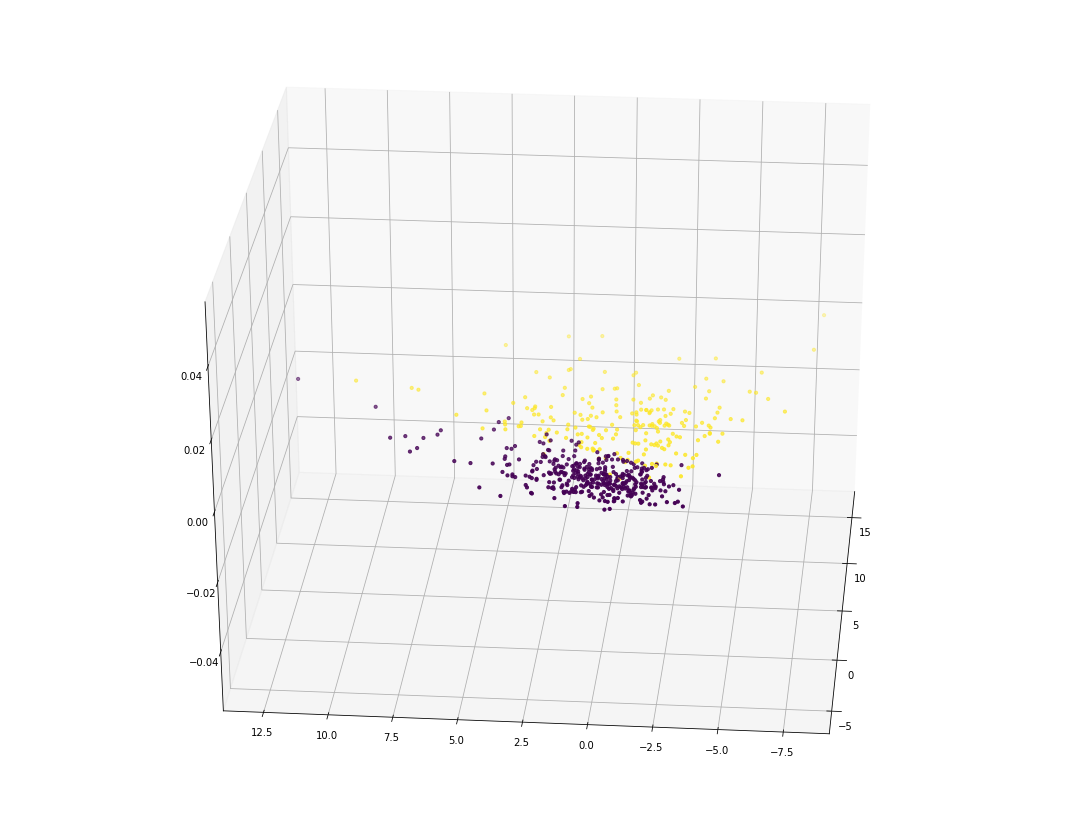

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(19,15))
ax=fig.add_subplot(111,projection='3d')
ax.scatter (x_pca[:,0],x_pca[:,1],c=y,s=10)
ax.view_init(30,185)

# splitting PCA data

In [27]:
training_x,testing_x,training_y,testing_y=train_test_split(x_pca,y,test_size=0.3,random_state=0)

# Decision Tree Classifier on PCA data

In [28]:
clf=DecisionTreeClassifier()
clf=clf.fit(training_x,training_y)
y_pred=clf.predict(testing_x)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [29]:
metrics.accuracy_score(testing_y,y_pred)

0.8771929824561403

# KNN Classifier on PCA data

In [30]:
model=KNeighborsClassifier()
model.fit(training_x,training_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
model.score(testing_x,testing_y)

0.9122807017543859

# Ensemble Learning - Bagging on PCA data

In [32]:
bg1=BaggingClassifier(KNeighborsClassifier(),max_samples=0.5,max_features =1,n_estimators =20)
bg1.fit(training_x,training_y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1,
                  max_samples=0.5, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [33]:
bg1.score(testing_x,testing_y)

0.8771929824561403

In [34]:
bg2=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features =1,n_estimators =20)
bg2.fit(training_x,training_y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [35]:
bg2.score(testing_x,testing_y)

0.8713450292397661

In [36]:
bg3=BaggingClassifier(SVC(),max_samples=0.5,max_features =1,n_estimators =20)
bg3.fit(training_x,training_y)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1,
                  max_samples=0.5, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [37]:
bg3.score(testing_x,testing_y)

0.6842105263157895

# TSNE

In [38]:
from sklearn.manifold import TSNE

In [39]:
model=TSNE (n_components=2,random_state=0,angle=0,perplexity=28.0,n_iter=1000)
tsne_data=model.fit_transform(data)
print(tsne_data)


[[-21.670677  27.72314 ]
 [-20.399681  30.64719 ]
 [-14.606686  31.032763]
 ...
 [  7.789732  26.561525]
 [-17.771704  30.803356]
 [-36.48955  -31.105394]]


In [40]:
tsne_df=pd.DataFrame(tsne_data)
tsne_df

,0,1
0,-21.670677,27.723141
1,-20.399681,30.647190
2,-14.606686,31.032763
3,5.487320,-31.215391
4,-12.990229,28.807545
...,...,...
564,-21.911905,31.957001
565,-15.651486,30.189821
566,7.789732,26.561525
567,-17.771704,30.803356


In [41]:
model.fit(tsne_df,y)


TSNE(angle=0, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=28.0, random_state=0, verbose=0)

# visualization of TSNE in 3D

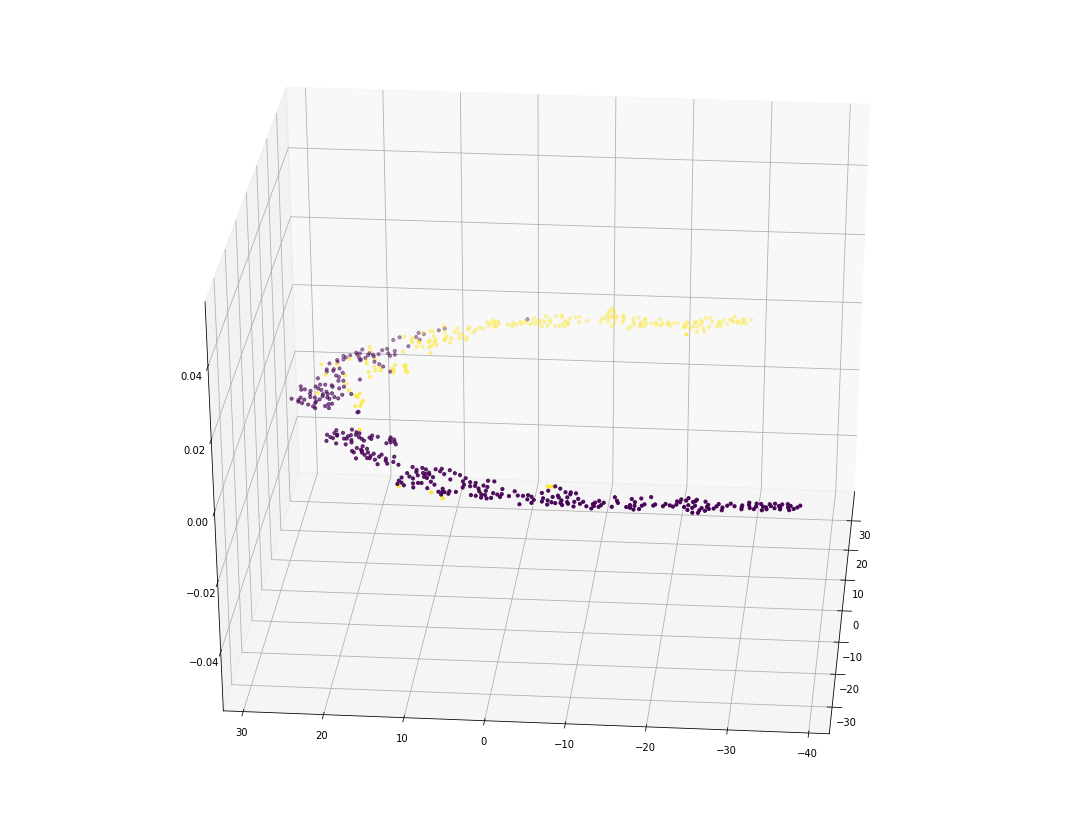

In [42]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(19,15))
ax=fig.add_subplot(111,projection='3d')
ax.scatter (tsne_data[:,1],tsne_data[:,0],c=y,s=10)
ax.view_init(30,185)

# Visualization of TSNE in 2D

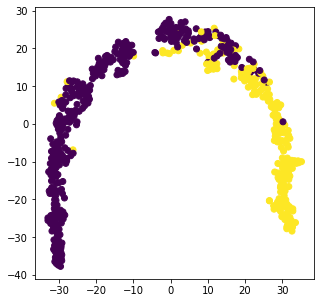

In [43]:
plt.figure(figsize=(5,5))
plt.scatter(tsne_data[:,1],tsne_data[:,0],c=y)

# Splitting TSNE data

In [44]:
training_x1,testing_x1,training_y1,testing_y1=train_test_split(tsne_df,y,test_size=0.3,random_state=0)

# Decision Tree Classifier on TSNE data

In [45]:
clf=DecisionTreeClassifier()
clf=clf.fit(training_x1,training_y1)
y_pred1=clf.predict(testing_x1)
y_pred1


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [46]:
metrics.accuracy_score(testing_y1,y_pred1)

0.9181286549707602

# KNN Classifier on TSNE data

In [47]:
KNN2=KNeighborsClassifier()
KNN2.fit(training_x1,training_y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
KNN2.score(testing_x1,testing_y1)

0.935672514619883

# Ensemble Learning - Bagging on TSNE data

In [49]:
bg4=BaggingClassifier(KNeighborsClassifier(),max_samples=0.5,max_features =1,n_estimators =20)
bg4.fit(training_x1,training_y1)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1,
                  max_samples=0.5, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [50]:
bg4.score(testing_x1,testing_y1)


0.9064327485380117

In [51]:
bg5=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features =1,n_estimators =20)
bg5.fit(training_x1,training_y1)


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [52]:
bg5.score(testing_x1,testing_y1)


0.8538011695906432

In [53]:
bg6=BaggingClassifier(SVC(),max_samples=0.5,max_features =1,n_estimators =20)
bg6.fit(training_x1,training_y1)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1,
                  max_samples=0.5, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [54]:
bg6.score(testing_x1,testing_y1)

0.8011695906432749

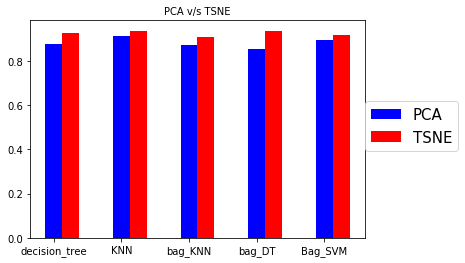

In [55]:
import numpy as np
x=np.arange(5)
models=['decision_tree','KNN','bag_KNN','bag_DT','Bag_SVM']
PCA=[0.8771929824561403,0.9122807017543859,0.8713450292397661,0.8538011695906432,0.8947368421052632]
TSNE=[0.9239766081871345,0.935672514619883,0.9064327485380117,0.935672514619883,0.9181286549707602]
plt.bar(x+0.00,PCA,color="b",width=0.25,label="PCA")
plt.bar(x+0.25,TSNE,color="r",width=0.25,label="TSNE")
plt.xticks(x,models)
plt.title("PCA v/s TSNE",fontsize=10)
plt.legend(fontsize=15,loc=(1,0.4))
plt.show()